## MBAN2 Mateus Parolin Gomes

# Business Analysis Report on Real Estate Valuation Dataset

# Introduction

As a business analyst, exploring datasets to uncover actionable insights is a crucial part of decision-making. This analysis focuses on a real estate valuation dataset from Taiwan. The purpose of this document is to share the approach, analysis, and key findings from the exploration of this dataset, while explaining the process in a way that a junior business analyst can follow and learn from. The analysis was conducted in Python, leveraging libraries such as Pandas, Matplotlib, and Seaborn to visualize and analyze the data.

# Data Loading and Preprocessing

The first step in any data analysis project is to load and examine the dataset. Using Python in Google Colab, the dataset was imported and converted into a Pandas DataFrame for ease of manipulation, transforming and manipulating data.

The date column was formatted to follow the "2024 December" format, making it more intuitive for analysis and visualization. This step ensures consistency and readability in temporal data, which is essential for identifying trends over time.

# Handling Missing Values and Inconsistencies

Missing values and anomalies were addressed using imputation methods or by removing irrelevant records. This ensures the dataset accurately represents the real-world scenario it is derived from.

# Summary Statistics

To understand the central tendencies and variability of the data, summary statistics were computed for numerical features. These include:

**Mean**: 37.98

**Median**: 38.45

**Mode**: 24.7

**Standard** **Deviation**: 13.61

**Variance**: 185.14

**Minimum**: 7.6

**Maximum**: 117.5

These metrics provide a foundational understanding of the dataset’s characteristics. For example, the mean and median being close indicates a relatively symmetric distribution of house prices, but the maximum value (117.5) suggests the presence of significant outliers.



# Exploratory Data Analysis (EDA)

EDA was performed to explore patterns and relationships among the features.

**Distributions of Numeric Features**
Histograms and box plots revealed:

*   Houses with a price of unit area around 40 are the most common.
*   Houses aged 15 years are the most frequent in the dataset.
*   Properties near six convenience stores are the most typical.


These visualizations highlight key attributes of the dataset, helping to focus further analysis.

**Scatter Plots**
Scatter plots were created to examine relationships between house prices and other attributes:


*   **House Price vs. House Age**: Prices are evenly distributed regardless of age.

*   **House Price vs. Distance to MRT Station**: A clear trend shows that prices increase as proximity to MRT stations improves.

*   **House Price vs. Number of Convenience Stores**: Prices show no strong trend based on the number of nearby stores.

These visualizations help identify patterns and anomalies, guiding deeper analysis.

**Correlation Matrix**
A correlation matrix was generated to quantify relationships between features. Key insights include:


*   Distance to MRT stations (“-0.67” correlation) has the most significant impact on house prices. The negative correlation indicates that properties closer to MRT stations tend to have higher prices.

This finding underscores the importance of accessibility in real estate valuation.

**Geospatial Analysis**
By plotting properties on a map using latitude and longitude, we identified clusters of high-value properties around a specific area (latitude 24.98, longitude 121.54). This suggests localized factors influencing property values, such as proximity to desirable locations or amenities.

**Trend Analysis Over Time**
A trend chart of house prices over time revealed that prices have remained relatively stable, with a notable peak in April 2013. This could warrant further investigation into external factors influencing the market at that time.

**Outlier Analysis**
Analyzing the distribution of house prices revealed outliers, with values of 117.5, 78.3, and 78.0 standing out significantly. These may represent luxury or high-demand properties and should be investigated further to understand their unique characteristics.

**Bar Chart of Unit Prices by MRT Proximity**
A bar chart confirmed that properties very close to MRT stations command the highest unit prices, further supporting the correlation analysis findings.



# Key Findings and Business Implications

**Proximity to MRT Stations**:
The analysis highlights the significant influence of MRT station proximity on house prices. Developers and investors should prioritize properties near MRT stations to maximize value.

**Geospatial Clusters**:
High-value properties are concentrated in specific areas. Understanding the unique factors driving these clusters can inform strategic investments and development projects.

**Stability in Prices Over Time**:
The relative stability of prices suggests a mature market with limited volatility. However, the 2013 price peak may indicate an event or policy change worth investigating for future forecasting.

**Common Property Characteristics**:
The dataset shows that mid-range properties dominate the market. Developers may consider catering to this segment to meet market demand.

**Outliers**:
Luxury properties, as represented by the outliers, suggest opportunities for niche markets targeting high-income buyers.

# Conclusion

This analysis demonstrates the value of using Python for real estate data exploration. By employing summary statistics, visualizations, and advanced analysis techniques, we’ve uncovered key factors influencing property values. These findings can guide business decisions in real estate development, marketing, and investment strategies.

For a junior business analyst, this case study underscores the importance of:


*   Cleaning and preparing data meticulously.
*   Using diverse analytical techniques to uncover insights.
*   Visualizing data effectively to communicate findings.

With these principles, we can transform data into actionable business intelligence, driving better outcomes for stakeholders.

# References

*   OpenAI. (2024). ChatGPT (December 2024 version) [Large language model]. https://chatgpt.com/c/6723c0d4-139c-8006-9a1e-8f6a50610dc8
*   University of California, Irvine. (n.d.). Real estate valuation data set. UCI Machine Learning Repository. Retrieved December 11, 2024, from https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

In [89]:
import pandas as pd

In [90]:
# # load txt files
# ticdata = pd.read_csv('ticdata2000.txt')
# ticeval = pd.read_csv('ticeval2000.txt')

# # print txt files
# print(ticdata.head())
# print(ticeval.head())

In [91]:
# prompt: load xlsx file imported to collab

import pandas as pd

# load xlsx file
real_estate = pd.read_excel('Real estate valuation data set.xlsx')

# print data frame
print(real_estate.head())

   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [92]:
# prompt: convert the column X1 transaction data from the format 2013.250 to 2013 March, 2013.500 to 2013 June, etc. Use real_state

# Fixing date column format

def convert_transaction_date(date_str):
    year = int(float(date_str))
    decimal_part = float(date_str) - year
    month_num = int(round(decimal_part * 12))

    month_names = {
        1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
        7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
    }

    try:
      month_name = month_names[month_num]
    except KeyError:
      month_name = "Unknown" # Handle cases where the month calculation falls outside 1-12

    return f"{year} {month_name}"


# Apply the conversion function to the 'X1 transaction date' column
real_estate['X1 transaction date'] = real_estate['X1 transaction date'].astype(str).apply(convert_transaction_date)

# Print the updated DataFrame to verify
print(real_estate.head())

   No X1 transaction date  X2 house age  \
0   1       2012 November          32.0   
1   2       2012 November          19.5   
2   3           2013 July          13.3   
3   4           2013 June          13.3   
4   5        2012 October           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391        

In [93]:
# prompt: Identify missing values or inconsistencies and handle them appropriately. Use real_estate

# Identify missing values or inconsistencies and handle them appropriately.

# Check for missing values
print(real_estate.isnull().sum())

# Handle missing values (example: fill with mean for numerical columns)
numerical_cols = real_estate.select_dtypes(include=['number']).columns
for col in numerical_cols:
    real_estate[col].fillna(real_estate[col].mean(), inplace=True)

# Recheck for missing values
print(real_estate.isnull().sum())

# Check for inconsistencies (example: check data types and ranges)
print(real_estate.info())
print(real_estate.describe())

# Print the updated DataFrame to verify
print(real_estate.head())


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                     

<ipython-input-93-07835371efce>:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [94]:
# Summary Statistics

# Calculate statistics for 'Y house price of unit area'
mean_price = real_estate['Y house price of unit area'].mean()
median_price = real_estate['Y house price of unit area'].median()
mode_price = real_estate['Y house price of unit area'].mode()[0]  # Access the first mode value
std_price = real_estate['Y house price of unit area'].std()
variance_price = real_estate['Y house price of unit area'].var()
min_price = real_estate['Y house price of unit area'].min()
max_price = real_estate['Y house price of unit area'].max()

# Print the results
print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")
print(f"Standard Deviation: {std_price}")
print(f"Variance: {variance_price}")
print(f"Minimum: {min_price}")
print(f"Maximum: {max_price}")

Mean: 37.980193236714975
Median: 38.45
Mode: 24.7
Standard Deviation: 13.606487697735314
Variance: 185.13650746862245
Minimum: 7.6
Maximum: 117.5


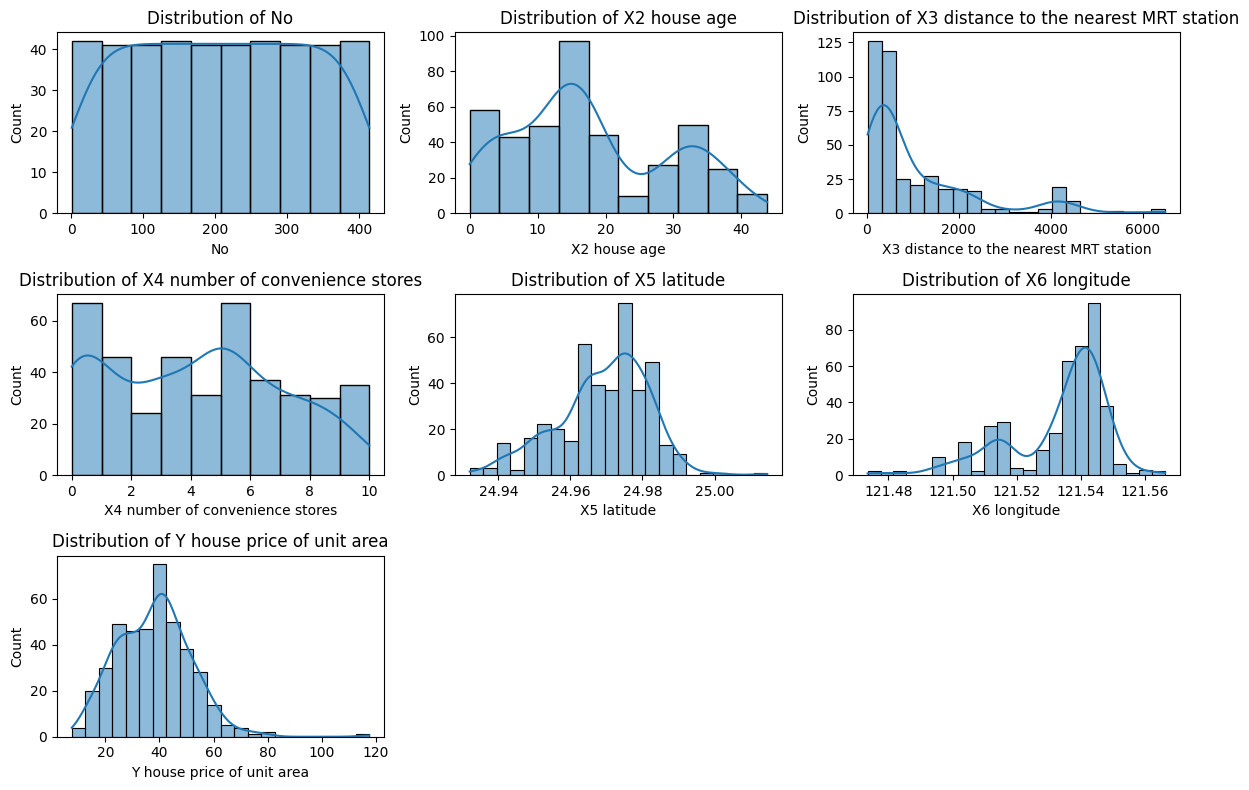

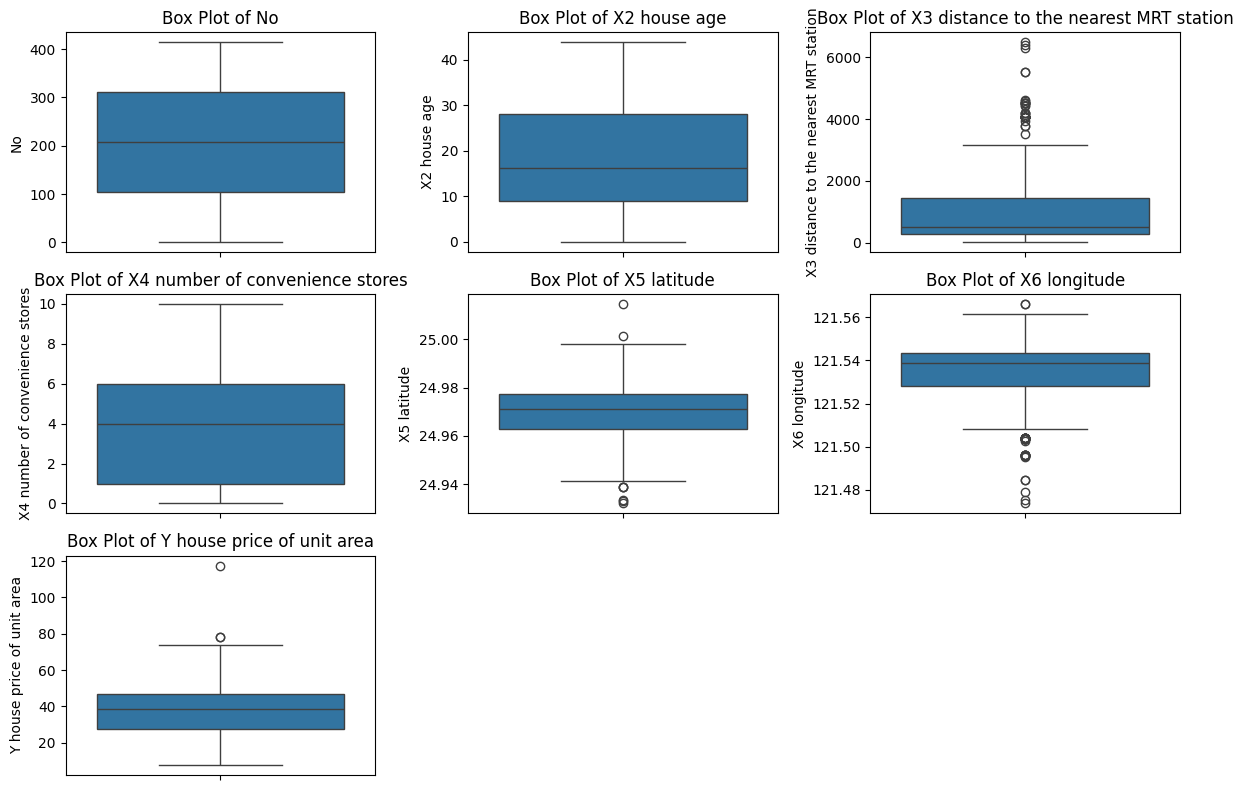

In [95]:
# prompt: Explore the distributions of numeric features using histograms or box plots. Use real_estate

import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(real_estate.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(real_estate[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Create box plots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(real_estate.select_dtypes(include=['number']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=real_estate[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

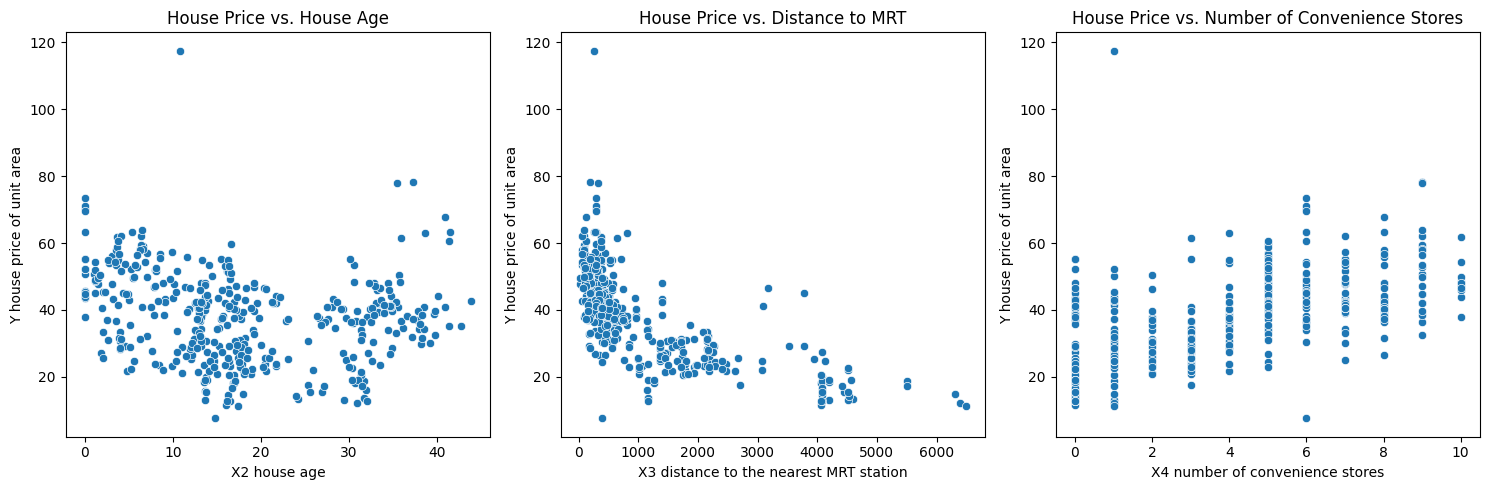

In [96]:
# prompt: Create a scatter plot in order to visualize house price vs. house age, house price vs. distance to MRT station and house price vs. number of convenience stores. Use real_estate

# Create scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='X2 house age', y='Y house price of unit area', data=real_estate)
plt.title('House Price vs. House Age')

plt.subplot(1, 3, 2)
sns.scatterplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=real_estate)
plt.title('House Price vs. Distance to MRT')

plt.subplot(1, 3, 3)
sns.scatterplot(x='X4 number of convenience stores', y='Y house price of unit area', data=real_estate)
plt.title('House Price vs. Number of Convenience Stores')

plt.tight_layout()
plt.show()

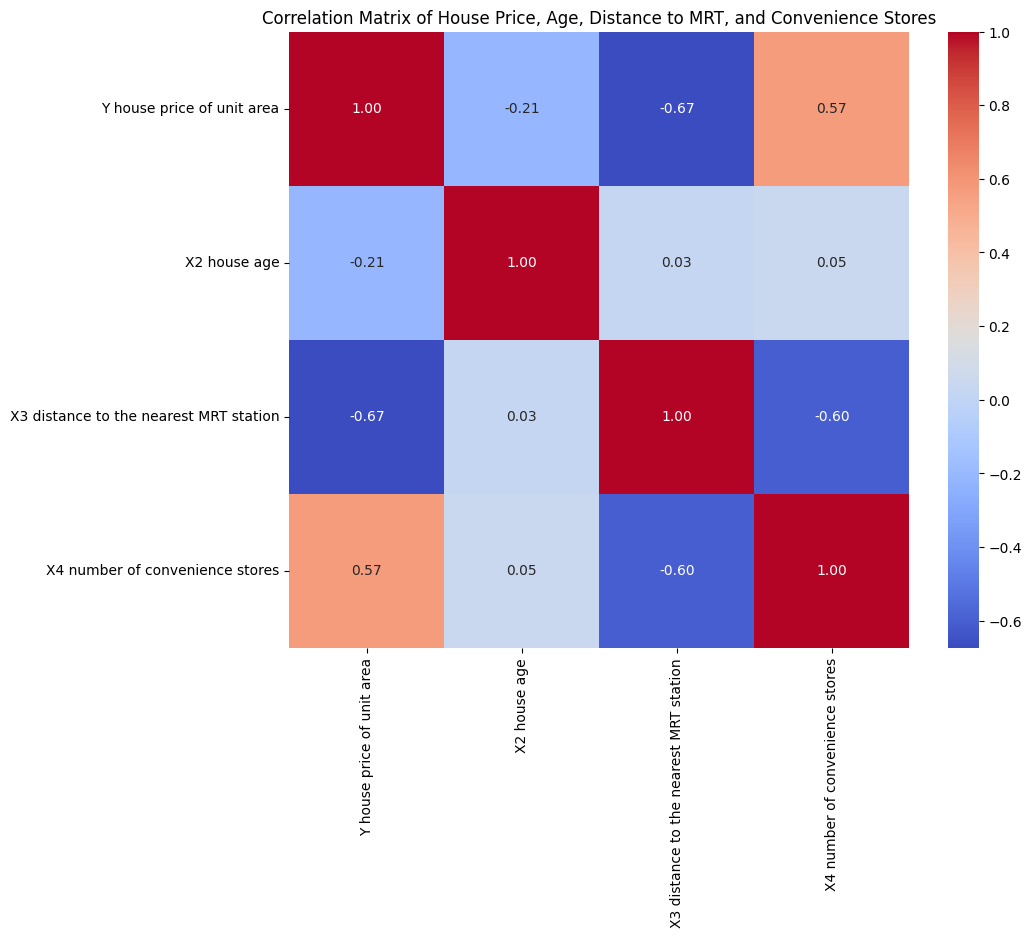

In [97]:
# prompt: Create a heatmap displaying correlations between house price, house age, distance to MRT station and number of convenience stores. Use real estate

# Select relevant columns for the correlation matrix
correlation_cols = ['Y house price of unit area', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
correlation_data = real_estate[correlation_cols]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of House Price, Age, Distance to MRT, and Convenience Stores')
plt.show()

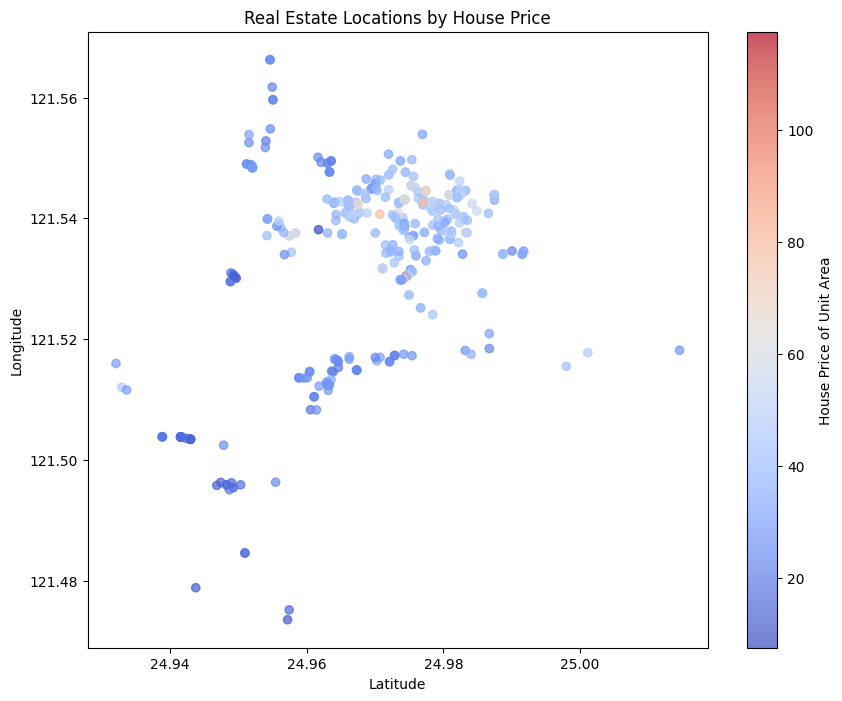

In [98]:
# prompt: Create a map chart using latitude and longitude to map the locations and color-code by house price. Create the color grade from blue (lowest price) to red (highest price). Use real_estate

# Create the map chart
plt.figure(figsize=(10, 8))

# Scatter plot with color mapping based on house price
scatter = plt.scatter(real_estate['X5 latitude'], real_estate['X6 longitude'],
                     c=real_estate['Y house price of unit area'], cmap='coolwarm', alpha=0.7)

# Add colorbar
plt.colorbar(scatter, label='House Price of Unit Area')

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Real Estate Locations by House Price')

# Show the plot
plt.show()

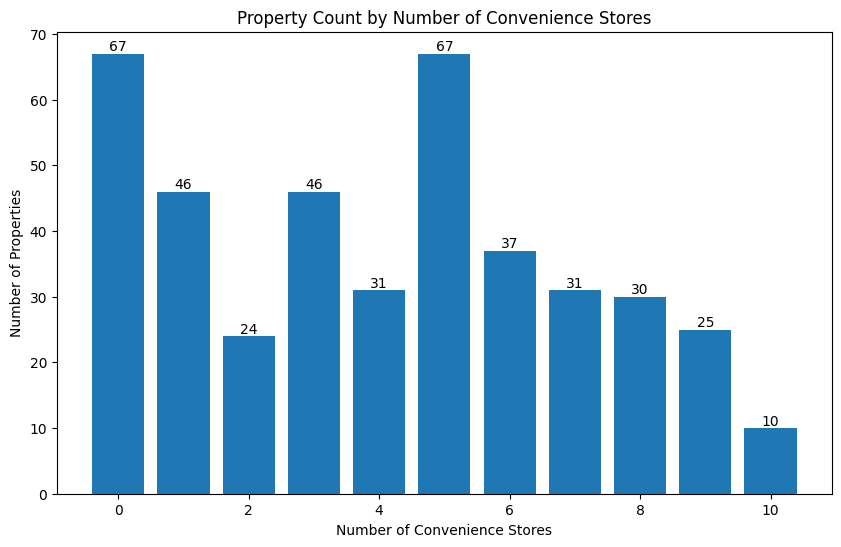

In [99]:
# prompt: Create a bar chart showing the count of properties grouped by the number of convenience stores. Use real_estate. Show data labels on top of bars.

# Group the data by the number of convenience stores and count the properties in each group
convenience_store_counts = real_estate.groupby('X4 number of convenience stores').size().reset_index(name='Property Count')

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(convenience_store_counts['X4 number of convenience stores'], convenience_store_counts['Property Count'])
plt.xlabel('Number of Convenience Stores')
plt.ylabel('Number of Properties')
plt.title('Property Count by Number of Convenience Stores')

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.show()

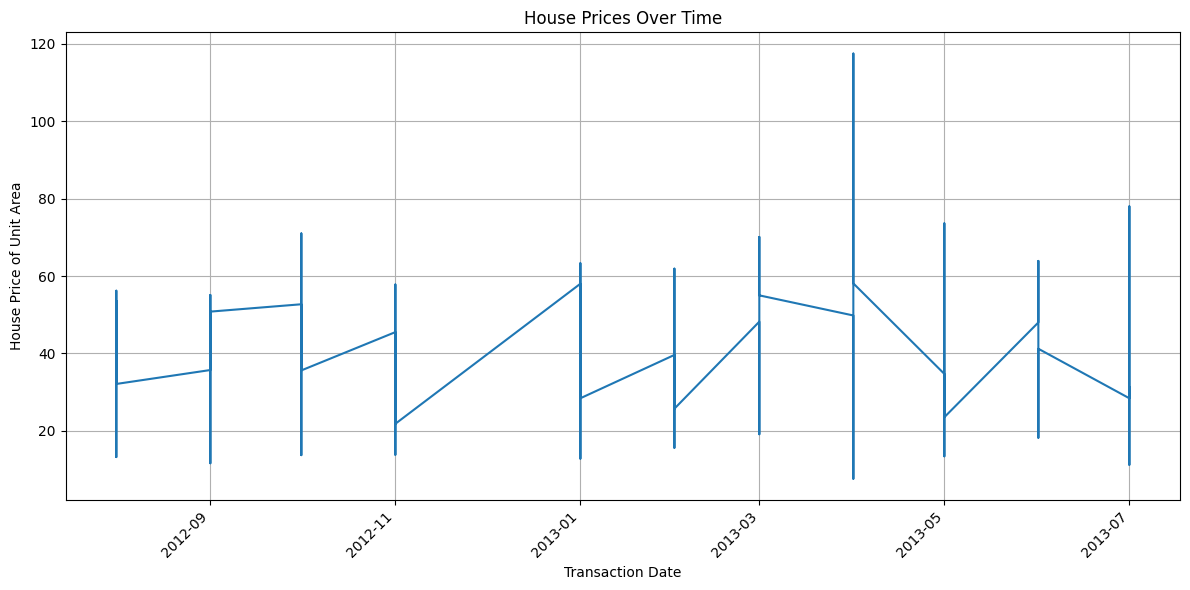

In [100]:
# prompt: For a trend analysis, plot house prices over time to identify trends related to transaction dates. Use real_estate

# Convert 'X1 transaction date' to datetime objects for proper plotting
real_estate['X1 transaction date'] = pd.to_datetime(real_estate['X1 transaction date'], format='%Y %B', errors='coerce')

# Sort the DataFrame by transaction date
real_estate = real_estate.sort_values(by='X1 transaction date')

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(real_estate['X1 transaction date'], real_estate['Y house price of unit area'])
plt.xlabel('Transaction Date')
plt.ylabel('House Price of Unit Area')
plt.title('House Prices Over Time')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

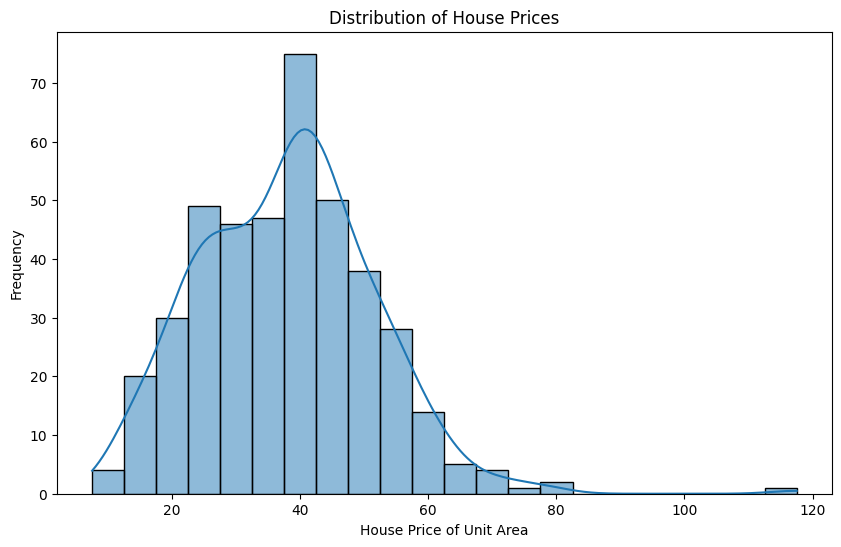

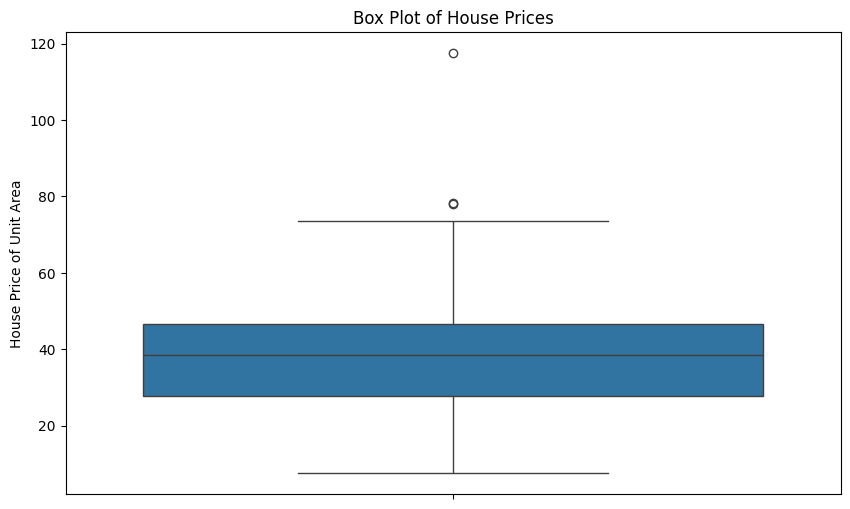

Skewness of House Prices: 0.5976770142537481
Number of outliers: 3


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
270,271,2013-04-01,10.8,252.5822,1,24.97460,121.53046,117.5
220,221,2013-04-01,37.2,186.5101,9,24.97703,121.54265,78.3
312,313,2013-07-01,35.4,318.5292,9,24.97071,121.54069,78.0


In [101]:
# prompt: Analyze the distribution of house prices (Y) to check for skewness or outliers. Use real_estate

# Analyze the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(real_estate['Y house price of unit area'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('House Price of Unit Area')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=real_estate['Y house price of unit area'])
plt.title('Box Plot of House Prices')
plt.ylabel('House Price of Unit Area')
plt.show()

# Calculate skewness
from scipy.stats import skew
skewness = skew(real_estate['Y house price of unit area'])
print(f"Skewness of House Prices: {skewness}")

# Identify outliers (e.g., using IQR)
Q1 = real_estate['Y house price of unit area'].quantile(0.25)
Q3 = real_estate['Y house price of unit area'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = real_estate[(real_estate['Y house price of unit area'] < lower_bound) | (real_estate['Y house price of unit area'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
outliers

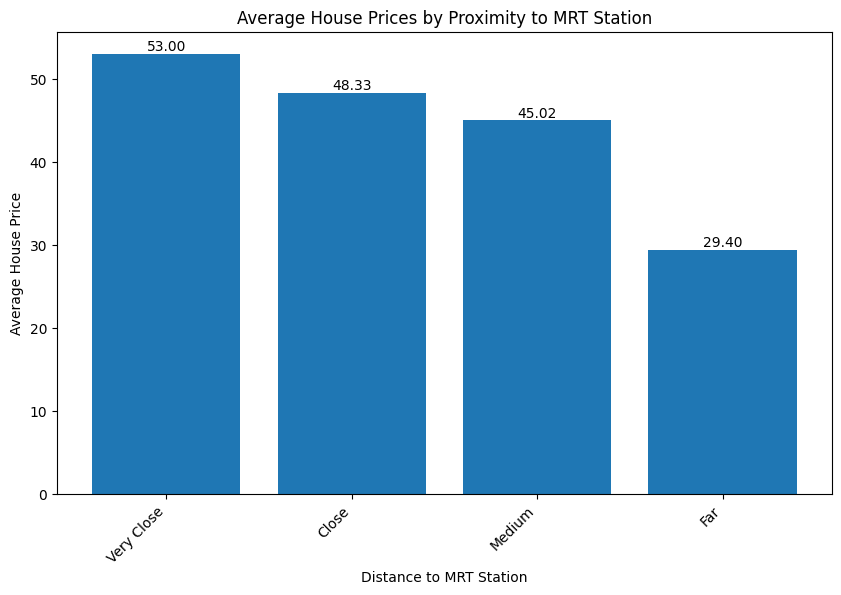

In [102]:
# prompt: Group properties by proximity to MRT stations or regions based on latitude (X5) and longitude (X6) and compare average house prices. Create a bar chart to compare. SOrt by Very Close, Close Medium and Far, in that order. Use real estate

# Define distance thresholds (adjust as needed)
distance_thresholds = {
    'Very Close': 50,  # Example: Properties within 50 meters
    'Close': 200,     # Example: Properties within 200 meters
    'Medium': 500,    # Example: Properties within 500 meters
    'Far': float('inf')  # Properties beyond 500 meters
}

# Categorize properties based on distance to MRT
def categorize_distance(distance):
    for category, threshold in distance_thresholds.items():
        if distance <= threshold:
            return category
    return 'Far'  # Default to 'Far' if no other category applies

real_estate['Distance Category'] = real_estate['X3 distance to the nearest MRT station'].apply(categorize_distance)

# Group by distance category and calculate average house prices
average_prices_by_distance = real_estate.groupby('Distance Category')['Y house price of unit area'].mean().reset_index()

# Sort the categories in the desired order
category_order = ['Very Close', 'Close', 'Medium', 'Far']
average_prices_by_distance = average_prices_by_distance.set_index('Distance Category').loc[category_order].reset_index()


# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(average_prices_by_distance['Distance Category'], average_prices_by_distance['Y house price of unit area'])

plt.xlabel('Distance to MRT Station')
plt.ylabel('Average House Price')
plt.title('Average House Prices by Proximity to MRT Station')
plt.xticks(rotation=45, ha='right')

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()